In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('titanic_dataset - titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<Axes: >

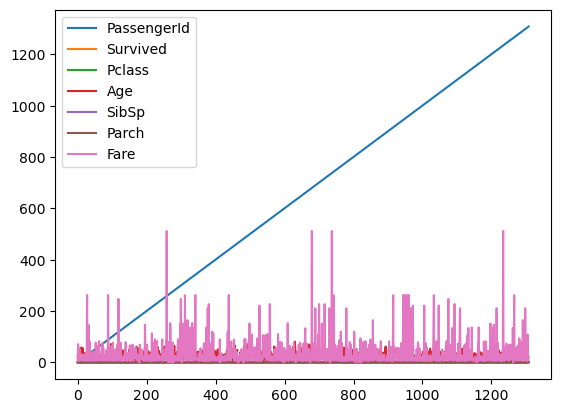

In [6]:
df.plot()

In [8]:
#checking null vales
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [54]:
#we dont need the cabin feature so it'll be dropped
df['Age'] = df["Age"].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
df['Fare'] = df['Fare'].fillna(df["Fare"].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [62]:
df.dropna(inplace=True)

In [63]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [64]:
#drop the unneccesay columns
new_df = df.drop(df.iloc[:,[3,8,10]],axis=1)
new_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
3,4,1,1,female,35.0,1,0,53.1000,S
6,7,0,1,male,54.0,0,0,51.8625,S
10,11,1,3,female,4.0,1,1,16.7000,S
11,12,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...,...
1295,1296,0,1,male,43.0,1,0,27.7208,C
1296,1297,0,2,male,20.0,0,0,13.8625,C
1298,1299,0,1,male,50.0,1,1,211.5000,C
1302,1303,1,1,female,37.0,1,0,90.0000,Q


In [65]:
cat_cols = new_df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
for col in cat_cols:
    new_df[col] = encoder.fit_transform(new_df[[col]])
new_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,0.0,38.0,1,0,71.2833,0.0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0
6,7,0,1,1.0,54.0,0,0,51.8625,2.0
10,11,1,3,0.0,4.0,1,1,16.7000,2.0
11,12,1,1,0.0,58.0,0,0,26.5500,2.0
...,...,...,...,...,...,...,...,...,...
1295,1296,0,1,1.0,43.0,1,0,27.7208,0.0
1296,1297,0,2,1.0,20.0,0,0,13.8625,0.0
1298,1299,0,1,1.0,50.0,1,1,211.5000,0.0
1302,1303,1,1,0.0,37.0,1,0,90.0000,1.0


In [66]:
temp = new_df.pop("Survived")
new_df["Survived"] = temp
new_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
1,2,1,0.0,38.0,1,0,71.2833,0.0,1
3,4,1,0.0,35.0,1,0,53.1000,2.0,1
6,7,1,1.0,54.0,0,0,51.8625,2.0,0
10,11,3,0.0,4.0,1,1,16.7000,2.0,1
11,12,1,0.0,58.0,0,0,26.5500,2.0,1
...,...,...,...,...,...,...,...,...,...
1295,1296,1,1.0,43.0,1,0,27.7208,0.0,0
1296,1297,2,1.0,20.0,0,0,13.8625,0.0,0
1298,1299,1,1.0,50.0,1,1,211.5000,0.0,0
1302,1303,1,0.0,37.0,1,0,90.0000,1.0,1


In [67]:
new_df.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Survived       False
dtype: bool

In [68]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state= 1)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#building the model

lr_model = LogisticRegression(solver='lbfgs')
dtc = DecisionTreeClassifier(max_depth=25,min_samples_leaf=4)

In [72]:
#fit the model for both data
lr_model.fit(x_train,y_train)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=4)

In [84]:
#assess the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,RocCurveDisplay,auc

#first for logistic regression
lr_preds = lr_model.predict(x_test)
dtc_preds = dtc.predict(x_test)

lr_accuracy = accuracy_score(lr_preds,y_test)
lr_classification = classification_report(lr_preds,y_test)
lr_confusion = confusion_matrix(lr_preds,y_test)
lr_tp,lr_fp,lr_threshold = roc_curve(lr_preds,y_test)
lr_auc = auc(lr_tp,lr_fp)

#for decision trees
dtc_accuracy = accuracy_score(dtc_preds,y_test)
dtc_classification = classification_report(dtc_preds,y_test)
dtc_confusion = confusion_matrix(dtc_preds,y_test)
dtc_tp,dtc_fp,dtc_threshold = roc_curve(dtc_preds,y_test)
dtc_auc = auc(dtc_tp,dtc_fp)

In [76]:
print("For logistic regression:")
print(f"accuracy_score: {lr_accuracy}")
print(f"classification: {lr_classification}")
print(f"confusion_matrix: {lr_confusion}")
print(f"auc: {lr_auc}")

For logistic regression:
accuracy_score: 0.7954545454545454
classification:               precision    recall  f1-score   support

           0       0.88      0.68      0.77        44
           1       0.74      0.91      0.82        44

    accuracy                           0.80        88
   macro avg       0.81      0.80      0.79        88
weighted avg       0.81      0.80      0.79        88

confusion_matrix: [[30 14]
 [ 4 40]]
auc: 0.7954545454545455


Text(0.5, 1.0, 'Roc Curve')

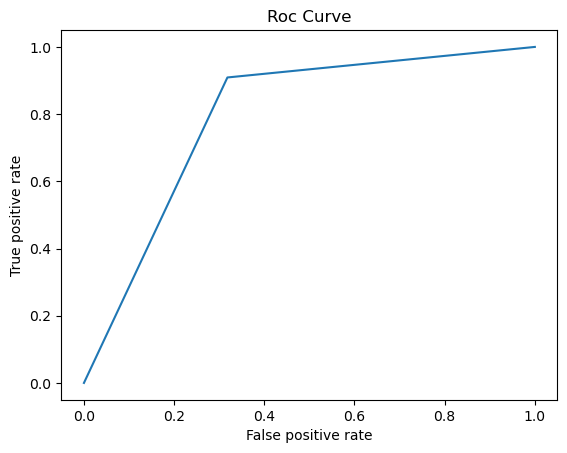

In [81]:
plt.plot(lr_tp,lr_fp)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Roc Curve")

In [86]:
#for decision trees
print("For Decision trees:")
print(f"accuracy_score: {dtc_accuracy}")
print(f"classification: {dtc_classification}")
print(f"confusion_matrix: {dtc_confusion}")
print(f"auc: {dtc_auc}")

For Decision trees:
accuracy_score: 0.7045454545454546
classification:               precision    recall  f1-score   support

           0       0.56      0.63      0.59        30
           1       0.80      0.74      0.77        58

    accuracy                           0.70        88
   macro avg       0.68      0.69      0.68        88
weighted avg       0.72      0.70      0.71        88

confusion_matrix: [[19 11]
 [15 43]]
auc: 0.6873563218390805


Text(0.5, 1.0, 'Roc Curve')

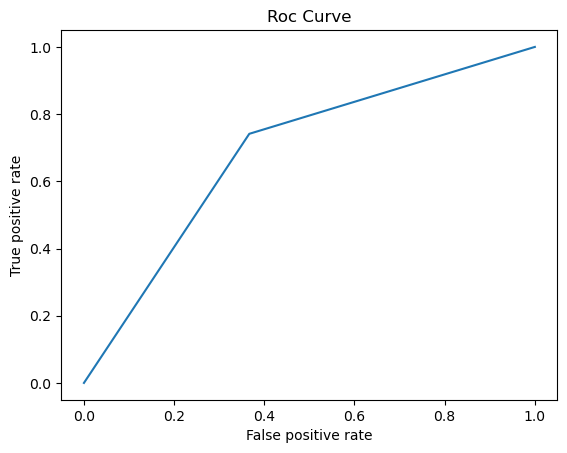

In [87]:
plt.plot(dtc_tp,dtc_fp)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Roc Curve")

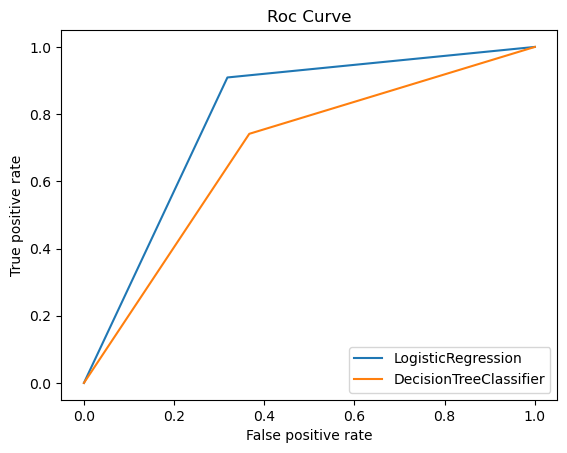

In [108]:
#comparision of models
plt.plot(lr_tp,lr_fp,label = "LogisticRegression")
plt.plot(dtc_tp,dtc_fp,label = "DecisionTreeClassifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Roc Curve")
plt.legend()

<BarContainer object of 2 artists>

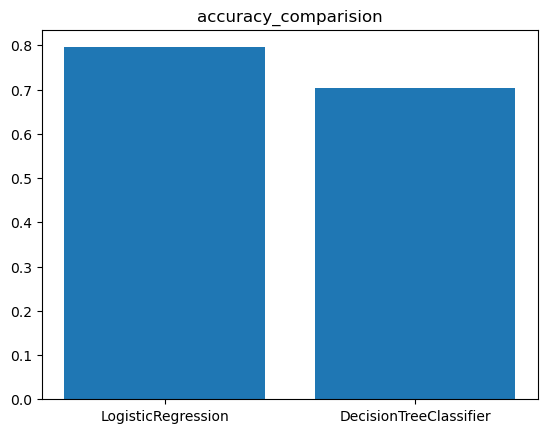

In [110]:
models = ["LogisticRegression","DecisionTreeClassifier"]
accuracy_scores = [lr_accuracy,dtc_accuracy]
plt.title("accuracy_comparision")

plt.bar(models,accuracy_scores)

In [119]:
df1 = pd.read_csv('titanic_dataset - titanic_dataset.csv')

In [115]:
from scipy.stats import chi2_contingency
contingency_tables =  pd.crosstab(df1["Age"].astype(str),df1["Sex"])
contingency_tables

Sex,female,male
Age,,
0.17,1,0
0.33,0,1
0.42,0,1
0.67,0,1
0.75,2,1
...,...,...
76.0,1,0
8.0,3,3
80.0,0,1


In [116]:
chi2_stats,p_value,dof,expected_frequency = chi2_contingency(contingency_tables)

In [117]:
print(chi2_stats)
print(p_value)
print(dof)
print(expected_frequency)

111.22967596039294
0.1703846866948876
98
[[  0.35599694   0.64400306]
 [  0.35599694   0.64400306]
 [  0.35599694   0.64400306]
 [  0.35599694   0.64400306]
 [  1.06799083   1.93200917]
 [  1.06799083   1.93200917]
 [  0.71199389   1.28800611]
 [  3.55996944   6.44003056]
 [  1.42398778   2.57601222]
 [  1.42398778   2.57601222]
 [  0.35599694   0.64400306]
 [  1.06799083   1.93200917]
 [  1.77998472   3.22001528]
 [  2.84797555   5.15202445]
 [  0.71199389   1.28800611]
 [  2.13598167   3.86401833]
 [  6.76394194  12.23605806]
 [  7.11993888  12.88006112]
 [ 13.88388083  25.11611917]
 [  1.06799083   1.93200917]
 [ 10.32391138  18.67608862]
 [  4.27196333   7.72803667]
 [  8.18792972  14.81207028]
 [  0.35599694   0.64400306]
 [ 14.59587471  26.40412529]
 [ 15.3078686   27.6921314 ]
 [  0.35599694   0.64400306]
 [  9.25592055  16.74407945]
 [  0.35599694   0.64400306]
 [ 16.73185638  30.26814362]
 [  0.35599694   0.64400306]
 [ 12.1038961   21.8961039 ]
 [ 10.67990833  19.32009167]
 [

if our null hypothesis is that it is related with 5% significance, since our model has p value of 0.17 with is > 0.05 we can say that it is not related,i.e null hypothesis is not accepted